## FASE 0. DESCARGANDO E IMPORTANDO TODAS LAS BIBLIOTECAS NECESARIAS

In [3]:
#Bibliotecas de procesamiento de datos

import pandas as pd
import numpy as np 
import random

#Bibliotecas de manejo de valores nulos

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Bibliotecas de visualización
import matplotlib.pyplot as plt 
import seaborn as sns

#Bibliotecas de estadísticas
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import shapiro, kstest, poisson, levene, bartlett, mannwhitneyu

#Bibliotecas de configuración

pd.set_option ('display.max_columns', None)

# Bibliotecas de manejo de advertencias
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


## FASE 1. VISUALIZACIÓN DE DATASET

In [4]:
#1. Cargamos el dataset de Goodreads de Kaggle asegurándonos que no nos vaya a dar ningun error

df_goodreads = pd.read_csv('goodreads.csv', on_bad_lines='skip')

In [ ]:
#Hacemos una breve visualización de las primeras/últimas/aleatorias columnas de nuestro nuevo marco de datos,
#utilizando los operadores .head, .tail y .sample. 

df_goodreads.head (5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
df_goodreads.tail (5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [7]:
df_goodreads.sample (5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
5556,20252,House Corrino (Prelude to Dune #3),Brian Herbert/Kevin J. Anderson,3.68,0553580337,9780553580334,eng,667,12257,167,8/27/2002,Spectra Books
2089,7556,Quimby The Mouse,Chris Ware,4.09,022407265X,9780224072656,en-US,69,1411,32,11/20/2003,Jonathan Cape
4211,15058,I'm Telling You Stories: Jeanette Winterson an...,Helena Grice/Tim Woods,3.70,9042003405,9789042003408,eng,136,10,2,1/1/1998,Brill/Rodopi
5709,21318,The Snow Spider (Snow Spider Trilogy #1),Jenny Nimmo,3.70,0439846757,9780439896757,en-US,146,2762,228,9/1/2006,Orchard Books (NY)
8570,32939,New Rules: Polite Musings from a Timid Observer,Bill Maher,3.71,1594862958,9781594862953,en-US,304,5034,305,7/26/2005,Rodale Books


## FASE 2. EXPLORATORY DATA ANALYSIS (EDA) DE DATASET


---

### **Paso 2.1:EDA del df_goodreads**


In [8]:
#Al comenzar nuestro proceso de EDA, procedemos a utilizar los operadores que nos proporcionarán una visualización aún más detallada del contenido de nuestro nuevo marco de datos.

df_goodreads.columns  # Nos muestra los nombres de todas las columnas del marco de datos en cuestión.

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

Al analizar el índice de columnas del DataFrame maestro, se han detectado unos hallazgos interesantes que condicionan la estrategia de limpieza:

>La columna '   num_pages' tiene esppacios en blanco al principio del nombre, lo que tendremos que solucionar.

> La columna 'text_reviews_count', número de las reseñas en texto será interesante para ver qué libros generan más debate. 

>Diferencia interesante entre ISBN (ISBN-10) y ISBN-13. ISBN es el formato antiguo que se usó principalmente hasta finales de 2006. ISBN-13 es un formato nuevo que es el estándar actual. Se usa desde 2007. Ambos identifican un mismo libro.

Es un dataset muy agradecido para hacer visualizaciones. 


In [9]:
df_goodreads.shape # Nos muestra el número de columnas y filas de nuestro marco de datos. 


(11123, 12)

Observación sobre las dimensiones del dataset: El DataFrame cuenta con 11.123 libros y 12 columnas. Lo suficientemente grande para encontrar tendencias estadísticas reales, pero lo suficientemente ligero para que Power BI no se quede colgado.

In [10]:
df_goodreads.dtypes # Este operador nos permite visualizar los tipos de datos en cada columna. 
#Al hacerlo, podemos tomar decisiones sobre el posible cambio de los tipos de datos en nuestras columnas.

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

Problemas de Formato (Dtypes)

* **`publication_date` es `object`:** Esto significa que Python lo lee como texto (string). Para poder filtrar por años tendremos que convertirlo a formato fecha (`datetime`).
* **`isbn13` es `int64`:** Python lo ve como un número entero, pero como es tan largo, Python intentará sumarlo, o podría mostrarlo con notación científica. La solución podría ser pasarlo a object/string, o no utilizar esta columna en el momento de hacer dashboards en PowerBI. 



In [11]:
df_goodreads.info() # Este operador nos muestra información aún más detallada sobre nuestro marco de datos, lo que nos permite familiarizarnos con él.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Al ejecutar .info(), se ha identificado que no tenemos valores nulos, puesto que todos dicen 11123 non-null, lo cual es una suerte inmensa - el dataset es bastante limpio. 

In [12]:
#Para visualizar ahora todo el marco de datos de una forma más elegante, utilizaremos el operador .describe.T

df_goodreads.describe().T 

,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


Observaciones Estadísticas (Anomalías Detectadas):

>El valor mínimo en 'num_pages' es 0. A menos que sea un libro invisible, esto es un error de datos o son audiolibros.Si calculamos el "promedio de páginas" en Power BI, estos ceros nos van a bajar la media artificialmente.

>Hay libros con un `average_rating` de **0.0** y un `ratings_count` de **0**. En un ranking de "peores libros", estos aparecerán los primeros, pero no es que sean malos, ¡es que nadie los ha leído! Habría que filtrar el dataset para quedarnos solo con libros que tengan al menos 5 o 10 valoraciones.


>En el `max` de `num_pages` vemos un número increible: **6,576 páginas**. ¡Eso es un libro gigante! Y en `ratings_count` hay uno con **4.5 millones** de votos (seguramente sea *Harry Potter* o *Crepúsculo*). Estos valores tan grandes pueden  "aplastar" las gráficas de barras. En Power BI, será mejor usar la **Mediana** en lugar del Promedio para que estos libros súper famosos no distorsionen la realidad del resto.


In [13]:
#Debido a que el número de filas en nuestros marcos de datos es muy grande, optamos por mostrar las columnas de datos numéricos y categóricos por separado:

#Columnas de datos numéricos:

df_goodreads.select_dtypes(include=[int])

,bookID,isbn13,num_pages,ratings_count,text_reviews_count
0,1,9780439785969,652,2095690,27591
1,2,9780439358071,870,2153167,29221
2,4,9780439554893,352,6333,244
3,5,9780439655484,435,2339585,36325
4,8,9780439682589,2690,41428,164
...,...,...,...,...,...
11118,45631,9781560254416,512,156,20
11119,45633,9780140110876,635,783,56
11120,45634,9780140131963,415,820,95
11121,45639,9780060878825,434,769,139



Viendo los números, hay algo muy revelador en la columna de `ratings_count`. Hay libros con **2 millones** de votos y otros con apenas **156**.

Si llevamos los datos así a Power BI, el `average_rating` puede ser engañoso. Un libro con un 5.0 basado en 2 votos no es "mejor" que uno con un 4.2 basado en 100,000 votos. 

En Power BI, podríamos crear una **Medida DAX** para calcular un "Rating ponderado", pero es más fácil si en Python ya marcamos cuáles son los "Best Sellers" por volumen de votos.

El libro de la fila `11119` tiene **158** páginas y **835** votos, pero solo **56** reseñas de texto. Eso significa que solo el 6% de los lectores se tomó el tiempo de escribir algo. Ese ratio de "conversación" es un KPI fantástico para un gráfico de burbujas.

In [14]:
df_goodreads.select_dtypes(include=[float])

,average_rating
0,4.57
1,4.49
2,4.42
3,4.56
4,4.78
...,...
11118,4.06
11119,4.08
11120,3.96
11121,3.72


>Es curioso, average_rating es nuestra única variable continua (decimal). Esto la convierte en la métrica estrella de nuestro análisis, pero al ser la única tipo float, tiene una responsabilidad enorme: es la que va a definir qué libros son "buenos" o "malos".

>Mirando esos valores (4.57, 4.49, etc.), nos podemos encontrar con un problema visual en Power BI si no lo preparamos antes. Aquí te lanzo mis preguntas/consejos sobre esta columna:

>En el head() algunos tienen 2 decimales y otros parecen tener más. En Power BI, ver un número como 4.571428... queda muy sucio. Podemos redondear a 2 decimales en Python para que el archivo sea más ligero y limpio.

In [15]:
df_goodreads.select_dtypes(include=[object])

,title,authors,isbn,language_code,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,eng,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,eng,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,eng,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,eng,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,0439682584,eng,9/13/2004,Scholastic
...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,1560254416,eng,12/21/2004,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,0140110879,eng,12/1/1988,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,0140131965,eng,8/1/1993,Penguin Books
11121,Poor People,William T. Vollmann,0060878827,eng,2/27/2007,Ecco



> Una curiosidad que vemos en la columna `language_code` (Idioma) es que tenemos `eng` y `spa`.
Es perfecto para un futuro **gráfico de sectores (Pie Chart)**. Nos permitirá ver qué porcentaje de nuestra biblioteca está en cada idioma.

> `publication_date` (Fecha) - Aquí es donde Python dice que es `Object`, pero Power BI necesita que sea `Date`.
Hay formatos como `9/16/2006`. Lo tenemos que convertir en Jupyter con `pd.to_datetime` antes de exportar, porque si no, Power BI los ordenará alfabéticamente (y pondrá el "1 de enero" antes que el "2 de febrero" de cualquier año).

> `publisher` (Editorial) - Tenemos "Scholastic Inc." y "Scholastic". Para Power BI son dos empresas distintas. Nos convendría unificar esos nombres en Jupyter.


In [16]:
# Contamos cuántas piezas únicas tiene realmente nuestro dataframe

print(f"Títulos únicos: {df_goodreads['title'].nunique()}")
print(f"Autores únicos: {df_goodreads['authors'].nunique()}")
print(f"Combinaciones únicas de Título/Autor: {len(df_goodreads.groupby(['title', 'authors']))}")

Títulos únicos: 10348
Autores únicos: 6639
Combinaciones únicas de Título/Autor: 10812


>Si tenemos 11.123 filas pero solo 10.812 combinaciones de Título/Autor, significa que hay **311 libros que están repetidos exactamente** (mismo título y mismo autor). Suelen ser diferentes ediciones (tapa blanda vs. tapa dura) o diferentes editoriales para el mismo libro.


>Tenemos 10.348 títulos únicos pero 10.812 combinaciones. Eso significa que hay unos **464 casos** donde diferentes autores han escrito libros con el **mismo título**. No vamos a usar solo el `title` como campo para agrupar datos.

>Hay 6.639 autores para 11.123 libros. Eso nos da un promedio de casi **2 libros por autor** y nos permite hacer un análisis de "Autores más prolíficos". Podremos ver quiénes son los autores que más publican y si su calidad (`average_rating`) se mantiene o baja a medida que publican más.


In [17]:
# Creamos un resumen de unicidad

resumen_unicos = pd.DataFrame({
    'Columna': df_goodreads.columns,
    'Valores Únicos': [df_goodreads[col].nunique() for col in df_goodreads.columns],
    'Tipo de Dato': [df_goodreads[col].dtype for col in df_goodreads.columns]
})

print(resumen_unicos)

               Columna  Valores Únicos Tipo de Dato
0               bookID           11123        int64
1                title           10348       object
2              authors            6639       object
3       average_rating             209      float64
4                 isbn           11123       object
5               isbn13           11123        int64
6        language_code              27       object
7            num_pages             997        int64
8        ratings_count            5294        int64
9   text_reviews_count            1822        int64
10    publication_date            3679       object
11           publisher            2290       object


>Lo interesante es que `bookID`, `isbn` e `isbn13` tienen exactamente **11,123 valores únicos**. Esto significa que cada fila es una edición física distinta.

* **El peligro:** Si en Power BI hacemos un ranking de "Libros más votados" y no agrupamos por título, *Harry Potter y la Piedra Filosofal* nos saldrá 5 veces (una por cada edición/ISBN), dividiendo sus votos y engañándonos en el ranking.
En Power BI usaremos siempre el `title` para agrupar, pero mantendremos el `bookID` para contar cuántas ediciones diferentes tenemos.

>Tenemos **27 idiomas**. Esto es genial para un "Slicer" o filtro lateral en Power BI. Lo más probable es que el 90% sean `eng` y `spa`, y el resto sean idiomas con 1 o 2 libros. Vamos a poder crear una columna en Python que agrupe los idiomas minoritarios como "Otros" para que nuestro gráfico de tarta no tenga 27 porciones minúsculas imposibles de leer.

> Hay **5,294 valores únicos de ratings** pero solo **1,822 de reseñas de texto**. Hay muchísimos libros que tienen el mismo número de reseñas de texto (probablemente muchos ceros o números bajos). Esto confirma que la mayoría de la gente "vota" con estrellas pero "no escribe". Es un insight fantástico para comparar la fidelidad de los lectores por género o autor.


In [21]:
# Filtramos solo las columnas que tienen pocos valores únicos, como por ejemplo la de idioma, para inspeccionarlas a fondo
columnas_interes = ['language_code']

for col in columnas_interes:
    print(f'VALORES ÚNICOS EN LA COLUMNA: {col.upper()}')
    print(df_goodreads[col].unique())
    print(f'Total de categorías: {df_goodreads[col].nunique()}')
    print('\n' + '-'*50 + '\n')

VALORES ÚNICOS EN LA COLUMNA: LANGUAGE_CODE
['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']
Total de categorías: 27

--------------------------------------------------



>Tenemos **cinco** variantes de inglés: `eng`, `en-US`, `en-GB`, `en-CA` y `enm` (Middle English). En Power BI, si alguien quiere filtrar por "Inglés", tendrá que seleccionar cinco casillas diferentes. Deberíamos unificarlos todos en uno solo (a menos que nos interese específicamente analizar el mercado canadiense vs. el británico).

>Códigos curiosos:

* **`mul` (Multiple languages):** Libros políglotas o diccionarios. Es una categoría interesante para ver si tienen más páginas de lo normal.
* **`grc` (Griego antiguo) y `lat` (Latín):** Probablemente ediciones de clásicos.
* **`ale`:** Alemán.


En un dataset de Goodreads de 11,000 libros, lo más probable es que el 95% del dataset sea `eng` y `spa`.

In [ ]:
#En esta etapa, otra cosa que podemos hacer como analistas de datos es simplemente visualizar los valores duplicados y los valores nulos.
#Posteriormente actuaremos sobre estos valores y decidiremos cuál es la mejor manera de gestionarlos.

#Visualización de duplicados: 

print(f"Filas 100% idénticas: {df_goodreads.duplicated().sum()}")

Filas 100% idénticas: 0


In [24]:
# Aquí vemos cuántas filas "sobran" si solo queremos un registro por libro

print(f"Duplicados por Título/Autor: {df_goodreads.duplicated(subset=['title', 'authors']).sum()}")

Duplicados por Título/Autor: 311


>Como las filas no son 100% idénticas, lo más probable es que ese libro de Harry Potter aparezca una vez con la editorial "Scholastic" y otra con "Bloomsbury", o que uno sea la versión de bolsillo y otro la de lujo. Tienen el mismo **Título** y **Autor**, pero diferente **ISBN**, **Publisher** o incluso **num_pages**. Si dejamos esos 311 duplicados, cuando hagamos un gráfico de "Los 10 autores con más libros", esos libros contarán doble o triple.

* **Ejemplo:** Si J.K. Rowling tiene 7 libros pero 3 tienen ediciones duplicadas, en nuestra gráfica parecerá que ha escrito 10 libros. **Eso es mentira.**


>Para que nuestro dashboard sea veraz, lo mejor es quedarnos con **una sola fila por cada combinación de Título/Autor**. Preferiblemente, con la que tenga más votos (`ratings_count`), porque suele ser la edición "principal".


In [26]:
#Visualización de valores nulos 

nulls=df_goodreads.isnull().sum()
nulls.sort_values(ascending=False)

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

>**Nos damos cuenta** de que no hay valores nulos lo que es estupendo en cuanto a este dataset. 

# FASE 3. LIMPIEZA DEL DATASET

La limpieza de los datasets se suele hacer en tres pasos:

**Paso 1: Limpieza de las columnas**

**Paso 2: Eliminacion de los duplicados**

**Paso 3: Gestión de valores nulos**

Una vez que los tres pasos sean completados, entraríamos en la Fase 4: Visualización.

**Paso 1: Limpieza de las columnas**

In [27]:
#Vamos a empezar visualizando  las columnas de dataset df_nyt_master para comprobar que todas son homogéneas, de vital importancia y que no haya redundancia ni nombres repetidos,
#Tenemos que ver si hay necesidad de eliminar algunas porque no serán relevantes en nuestro análisis, renombrarlas, gestionar las comas y los espacios, y por último modificar los tipos de datos.

print("\n--- ESTRUCTURA GOODREADS ---")
print(df_goodreads.info())


--- ESTRUCTURA GOODREADS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB
None


In [28]:
#Mostramos las primeras filas para detectar formatos visuales

print("\n--- VISTA PREVIA GOODREADS ---")
display(df_goodreads.head(3))


--- VISTA PREVIA GOODREADS ---


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


Después de revisar el contenido de las columnas, vamos a decidir que columnas de cada dataset son importantes para nuestro futuro análisis, y cuáles nos conviene borrarlas, renombrarlas, o crear algunas nuevas antes de hacer gestión de duplicados, y gestión de nulos. 

### **Análisis de Columnas Específicas (dataset Goodreads)**


* **`bookId` : esta columna no es relevante para nuestro análisis, pero la podemos mantener para poder identificar libros diferentes, como es su id único.
* **`title`**: Será una de las nuestras columnas clave para la visualización, y interpretación de algunos dashboards en PowerBi.
* **`authors`**: Será una de las nuestras columnas clave para la visualización, y interpretación de algunos dashboards en PowerBi. Hasta se puede comprobar cuáles eran algunos de los autores más prolificos. Vamos a quedarnos solamente con el autor principal.
* **`average_rating`**: Vamos a mantener esta columna porque aportará a nuestro análisis. Vamos a redondear los valores en ella a dos decimales.
* **`isbn`**: La vamos a borrar porque no aporta a nuestro análisis.
* **`isbn13`**: La vamos a borrar porque no aporta a nuestro análisis.
* **`language_code`**: Esta columna es muy relevante para nuestro análisis. Vamos a hacer algunos cambios en relación a ella, sin embargo: unificar todos los libros en inglés bajo el código 'eng', tener una apartado para los libros en español, y, finalmente, poner los idiomas minoritarios, en los que no enfocaremos nuestro análisis, en 'otros'
* **`num_pages`**: Mantenemos esta columna puesto que es relevante para nuestro análisis. Quitamos los espacios en blanco delante del nombre de esta columna. Quitamos los libros que parecen tener 0 páginas porque es un error.
* **`ratings_count`**: Esta columna puede ser relevante para nuestro análisis para comprobar el ratio entre los libros votados y reseñados. Habrá libros a los que nadie ha votado, pero los vamos a mantener porque no afectan el promedio.
* **`text_reviews_count`**: Esta columna puede ser relevante para nuestro análisis para comprobar el ratio entre los libros votados y reseñados
* **`publication_date`**: Mantenemos esta columna puesto que es relevante para nuestro análisis. Hay que cambiarla a formato date-time.
* **`publisher`**: Mantenemos esta columna puesto que es relevante para nuestro análisis. Hay que unificar los nombres de todos los publishers para que no haya errores como por ejemplo en "Scholastic," y "Scholastic INC."


In [29]:
#Comenzamos a borrar las columnas de df_nyt_master cuyo contenido o bien no nos resulta útil para nuestro análisis, o bien lo vamos a utilizar de df_goodreads.

columnas_a_borrar = [
    'isbn', 'isbn13'
]

df_goodreads = df_goodreads.drop(columns=columnas_a_borrar, errors='ignore')

In [30]:
#Comprobamos que las columnas de hecho se han eliminado correctamente

df_goodreads.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

**1.1:**

**Limpieza superficial -- manejando las comas y los espacios**

In [31]:
# 1. Limpiamos espacios en blanco al principio y al final de los NOMBRES de las columnas
df_goodreads.columns = df_goodreads.columns.str.strip()  

In [32]:
# 2. Limpiar solo espacios en blanco en el texto
for col in df_goodreads.columns:
    if df_goodreads[col].dtypes == "object":
        # Quitamos espacios al inicio/final pero dejamos las comas
        df_goodreads[col] = df_goodreads[col].str.strip()

print("✅ Datos normalizados. He mantenido las comas para no dañar los nombres de autores y títulos.")

✅ Datos normalizados. He mantenido las comas para no dañar los nombres de autores y títulos.


**1.2:**

**El manejo de tipo de datos dentro de la columna**

In [33]:
# En cuanto a la columna «average_rating», vamos a redondear los ratings a dos decimales para evitar que el archivo cargue decimales innecesarios. 

# 1. Aseguramos que la columna sea numérica (por si acaso) y redondeamos a 2 decimales
df_goodreads['average_rating'] = df_goodreads['average_rating'].astype(float).round(2)

# 2. Verificamos los primeros resultados para confirmar
print(df_goodreads[['title', 'average_rating']].head())



                                               title  average_rating
0  Harry Potter and the Half-Blood Prince (Harry ...            4.57
1  Harry Potter and the Order of the Phoenix (Har...            4.49
2  Harry Potter and the Chamber of Secrets (Harry...            4.42
3  Harry Potter and the Prisoner of Azkaban (Harr...            4.56
4  Harry Potter Boxed Set  Books 1-5 (Harry Potte...            4.78


In [34]:
#En cuanto a la columna <<publication_date>> vamos a convertirla a tipo de dato date-time

#Convertimos la columna a formato Fecha (Datetime)
# errors='coerce' convierte las fechas imposibles en valores nulos (NaT)
df_goodreads['publication_date'] = pd.to_datetime(df_goodreads['publication_date'], errors='coerce')

In [35]:
#Verificamos si hubo fechas con errores
fechas_erroneas = df_goodreads['publication_date'].isna().sum()
if fechas_erroneas > 0:
    print(f"Se han detectado {fechas_erroneas} fechas inválidas. Procedo a eliminarlas para que Power BI no de error.")
    # Eliminamos las filas que se quedaron sin fecha
    df_goodreads = df_goodreads.dropna(subset=['publication_date'])

Se han detectado 2 fechas inválidas. Procedo a eliminarlas para que Power BI no de error.


In [36]:
#Comprobamos que el tipo de dato ahora es datetime64
print("\nNuevo tipo de dato de la columna:")
print(df_goodreads['publication_date'].dtype)


Nuevo tipo de dato de la columna:
datetime64[ns]


In [37]:
#Mostramos las primeras filas para ver el formato (YYYY-MM-DD)
print("\nMuestra de fechas convertidas:")
print(df_goodreads['publication_date'].head())


Muestra de fechas convertidas:
0   2006-09-16
1   2004-09-01
2   2003-11-01
3   2004-05-01
4   2004-09-13
Name: publication_date, dtype: datetime64[ns]


In [38]:
#En cuanto a la columna <<publisher>> vamos a unificarla para que no haya errores como por ejemplo en Scholastic y Scholastic.Inc 

#Pasamos todo a minúsculas temporalmente para unificar mejor
df_goodreads['publisher'] = df_goodreads['publisher'].str.lower()

In [39]:
#Quitamos términos legales comunes que ensucian la unicidad
# Quitamos "inc", "ltd", "corp", "llc" y los puntos
terminos_a_quitar = [' inc', ' ltd', ' corp', ' llc', '.', ',']
for termino in terminos_a_quitar:
    df_goodreads['publisher'] = df_goodreads['publisher'].str.replace(termino, '', regex=False)

In [40]:
#Quitamos espacios en blanco que hayan podido quedar
df_goodreads['publisher'] = df_goodreads['publisher'].str.strip()

In [41]:
#Volvemos a poner la primera letra en mayúscula (formato Título) para que quede bonito en Power BI
df_goodreads['publisher'] = df_goodreads['publisher'].str.title()

In [42]:
#Comprobamos cuántas editoriales únicas quedan ahora
print(f"Ahora tenemos {df_goodreads['publisher'].nunique()} editoriales (antes teniamos 2290).")

Ahora tenemos 2209 editoriales (antes teniamos 2290).


In [43]:
#En cuanto a la columna <<authors>>,  vamos a quedarnos solamente con el autor principal

#Nos quedamos solo con el primer nombre antes de la barra '/'
df_goodreads['authors'] = df_goodreads['authors'].str.split('/').str[0]

In [44]:
#Limpiamos espacios que puedan haber quedado
df_goodreads['authors'] = df_goodreads['authors'].str.strip()

In [45]:
print(f"Ahora tienes {df_goodreads['authors'].nunique()} autores únicos.")
print(df_goodreads['authors'].head())

Ahora tienes 4215 autores únicos.
0    J.K. Rowling
1    J.K. Rowling
2    J.K. Rowling
3    J.K. Rowling
4    J.K. Rowling
Name: authors, dtype: object


In [46]:
#En cuanto a la columna <<num_pages>> vamos a modificar las entradas que parecen tener 0 páginas

# Contamos cuántos libros tienen 0 páginas
ceros = (df_goodreads['num_pages'] == 0).sum()
print(f"Hay {ceros} libros con 0 páginas.")

Hay 76 libros con 0 páginas.


In [47]:
# Si hay ceros, veamos cuáles son para entender por qué
if ceros > 0:
    print("\nEjemplos de libros con 0 páginas:")
    print(df_goodreads[df_goodreads['num_pages'] == 0][['title', 'authors', 'average_rating']].head())


Ejemplos de libros con 0 páginas:
                                                  title       authors  \
306   The 5 Love Languages / The 5 Love Languages Jo...  Gary Chapman   
853                    The Tragedy of Pudd'nhead Wilson    Mark Twain   
1061  Murder by Moonlight & Other Mysteries (New Adv...    NOT A BOOK   
1064  The Unfortunate Tobacconist & Other Mysteries ...    NOT A BOOK   
1230             The Da Vinci Code (Robert Langdon  #2)     Dan Brown   

      average_rating  
306             4.70  
853             3.79  
1061            4.00  
1064            3.50  
1230            3.84  


In [48]:
#Decidimos eliminar las entradas con 0 páginas para no bajar nuestro promedio de páginas por libro.

#Eliminamos libros con 0 páginas
df_goodreads = df_goodreads[df_goodreads['num_pages'] > 0]

In [49]:
#Eliminamos registros que no son libros reales (NOT A BOOK)
df_goodreads = df_goodreads[df_goodreads['authors'] != 'NOT A BOOK']

In [50]:
print(f"✅ Limpieza profunda realizada.")
print(f"Filas eliminadas: {76} (por páginas 0) + las de 'NOT A BOOK'.")
print(f"Total de filas finales para Power BI: {len(df_goodreads)}")


✅ Limpieza profunda realizada.
Filas eliminadas: 76 (por páginas 0) + las de 'NOT A BOOK'.
Total de filas finales para Power BI: 11042


In [51]:
#En cuanto a la columna <<language_code>> vamos a unificar todos tipos de ingles en uno, "eng", también separar los libros en español y mantener otros idiomas como "otros"


#Ver todos los idiomas y cuántos libros tiene cada uno
print("--- Conteo por Idioma ---")
conteo_idiomas = df_goodreads['language_code'].value_counts()
print(conteo_idiomas)

--- Conteo por Idioma ---
language_code
eng      8845
en-US    1397
spa       217
en-GB     211
fre       142
ger        98
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
ara         1
nl          1
srp         1
msa         1
glg         1
wel         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64


In [52]:
#Específicamente: ¿Cuántos tipos de Inglés hay?
tipos_ingles = [code for code in df_goodreads['language_code'].unique() if 'en' in str(code).lower()]
print(f"\n--- Variantes de Inglés detectadas ({len(tipos_ingles)}) ---")
print(df_goodreads[df_goodreads['language_code'].isin(tipos_ingles)]['language_code'].value_counts())


--- Variantes de Inglés detectadas (5) ---
language_code
eng      8845
en-US    1397
en-GB     211
en-CA       7
enm         3
Name: count, dtype: int64


In [53]:
#Cálculo de peso: ¿Cuánto ocupan los "otros"?
total_libros = len(df_goodreads)
eng_spa_count = df_goodreads['language_code'].isin(['eng', 'en-US', 'en-GB', 'en-CA', 'spa']).sum()
otros_count = total_libros - eng_spa_count
porcentaje_otros = (otros_count / total_libros) * 100


In [54]:
print(f"\n--- Resumen de Peso ---")
print(f"Inglés + Español representan el: {((eng_spa_count/total_libros)*100):.2f}% de los datos.")
print(f"Los otros 22 idiomas solo representan el: {porcentaje_otros:.2f}% de los datos.")


--- Resumen de Peso ---
Inglés + Español representan el: 96.69% de los datos.
Los otros 22 idiomas solo representan el: 3.31% de los datos.


In [55]:
#Unificamos las 5 variantes de inglés en una sola: 

variantes_eng = ['en-US', 'en-GB', 'en-CA', 'enm']
df_goodreads['language_code'] = df_goodreads['language_code'].replace(variantes_eng, 'eng')

In [56]:
print(f"Post-unificación: {df_goodreads['language_code'].value_counts().head(3)}")

Post-unificación: language_code
eng    10463
spa      217
fre      142
Name: count, dtype: int64


In [57]:
# Identificamos los idiomas que no son inglés, español, francés o alemán
idiomas_principales = ['eng', 'spa', 'fre', 'ger']
df_goodreads.loc[~df_goodreads['language_code'].isin(idiomas_principales), 'language_code'] = 'otros'


In [58]:
print("\nDistribución final para Power BI:")
print(df_goodreads['language_code'].value_counts())


Distribución final para Power BI:
language_code
eng      10463
spa        217
fre        142
otros      122
ger         98
Name: count, dtype: int64


**1.3:**

**El manejo de los nombres de las columnas**

Los nombres de este dataset están perfectos así. Al ser el dataset principal, es natural que conserve los nombres más limpios y directos.

**Paso 2:**

**El manejo de duplicados**

In [59]:
#Visualizamos los duplicados de df_nyt_master

df_goodreads.duplicated().sum()

np.int64(0)

**Anotación**

> No hay filas exactamente identicas. 

Pero el peligro puede ser, si hay diferentes ediciones del mismo libro. 

Imaginamos que tienes estos dos registros:

*Harry Potter y la Piedra Filosofal* | ISBN: 12345 | Rating: 4.5

*Harry Potter y la Piedra Filosofal* | ISBN: 99999 | Rating: 4.2

Para Python, como el ISBN es distinto, no son duplicados. Pero para nuestro informe de Power BI, si queremos saber cuál es el libro mejor valorado, no queremos que el mismo título aparezca varias veces. 

In [60]:
# Comprobamos duplicados basados solo en Título y Autor
duplicados_titulo = df_goodreads.duplicated(subset=['title', 'authors']).sum()
print(f"Hay {duplicados_titulo} ediciones repetidas que podrían ensuciar nuestros gráficos.")

Hay 687 ediciones repetidas que podrían ensuciar nuestros gráficos.


In [61]:
#Ordenamos el DataFrame: los que tienen más votos quedan arriba
df_goodreads = df_goodreads.sort_values('ratings_count', ascending=False)

In [62]:
#Eliminamos duplicados basándonos en Título y Autor
# 'keep=first' asegura que conservamos la edición con más votos (la que quedó arriba tras el sort)
df_goodreads = df_goodreads.drop_duplicates(subset=['title', 'authors'], keep='first')

print(f"✅ ¡Limpieza de ediciones completada!")
print(f"Se han eliminado las {687} ediciones repetidas.")
print(f"Total de libros únicos para Power BI: {len(df_goodreads)}")

✅ ¡Limpieza de ediciones completada!
Se han eliminado las 687 ediciones repetidas.
Total de libros únicos para Power BI: 10355


**Paso 3:**

**Gestión de nulos**

In [ ]:
#Visualizamos todos los valores nulos dentro del dataset y al parecer no los hay - el dataset es muy limpio.
 
null_values = df_goodreads.isnull().sum().sort_values(ascending=False)
null_values

bookID                0
title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [64]:
# Buscamos si hay celdas que solo tengan espacios o palabras que indiquen vacío
nulos_invisibles = df_goodreads.isin(['Unknown', 'None', ' ', '']).sum()
print("Nulos 'invisibles' detectados:")
print(nulos_invisibles[nulos_invisibles > 0])

Nulos 'invisibles' detectados:
authors    3
dtype: int64


In [65]:
# Filtramos las filas donde la columna authors tiene espacios vacíos o la palabra 'None'
filas_fantasma = df_goodreads[df_goodreads['authors'].isin(['Unknown', 'None', ' ', ''])]
print(filas_fantasma[['title', 'authors', 'publisher']])

                                 title  authors         publisher
5045                The Nibelungenlied  Unknown  Penguin Classics
5315                           Beowulf  Unknown   Signet Classics
5316  Beowulf: A Dual-Language Edition  Unknown            Anchor


**Anotación**

>Como se trata de solamente 3 filas de un total de más de 10.000, aproximadamente 0.03 %, lo más profesional es eliminarlas. No podemos inventarnos el autor, puesto que el autor es anónimo y un libro sin autor no nos sirve muy bien estadísticamente dicho. 

In [66]:
# Eliminamos los autores desconocidos
df_goodreads = df_goodreads[df_goodreads['authors'] != 'Unknown']

print(f"✅ 'Beowulf' y compañía han sido retirados. Nuestra lista de autores es ahora 100% auténtica.")
print(f"Registros finales: {len(df_goodreads)}")

✅ 'Beowulf' y compañía han sido retirados. Nuestra lista de autores es ahora 100% auténtica.
Registros finales: 10352


In [67]:
#Guardado final

df_goodreads.to_csv('goodreads_limpio.csv', index=False, encoding='utf-8-sig')


## FASE 4. VISUALIZACIÓN

Durante esta fase, responderemos a las preguntas planteadas, visualizaremos nuestras respuestas y, finalmente, destacaremos las ideas más importantes obtenidas tras la visualización.

Las preguntas son las siguientes:

>1. ¿Cómo se distribuyen las calificaciones promedio de los libros?

>2. ¿Existe alguna relación entre el número de las páginas y la calificación que recibe un libro?

>3. ¿Cuál es la proporción de libros según los idiomas principales que limpiamos?

>4. ¿Cómo varía la calificación promedio entre los 5 autores con más libros en el dataset?

>5. ¿Cómo ha cambiado el número de las reseñas promedio a lo largo de los años?

>6. ¿Existe alguna correlación entre el número total de votos y el número de reseñas escritas?

In [69]:
#Lo primero que tenemos que hacer es leer nuestro nuevo csv, goodreads_limpio, en el que basaremos todas las visualizaciones.add()

df_goodreads_limpio = pd.read_csv('goodreads_limpio.csv')

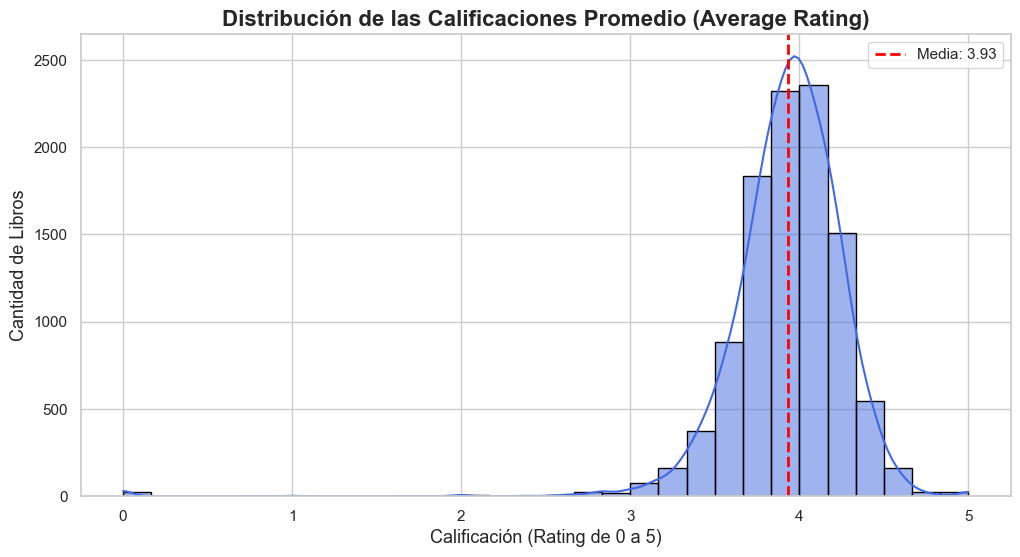

In [70]:
#1. ¿Cómo se distribuyen las calificaciones promedio de los libros?

import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creamos el Histograma + KDE
sns.histplot(df_goodreads_limpio['average_rating'], bins=30, kde=True, color='royalblue', edgecolor='black')

# Añadimos una línea vertical para la media (opcional, pero muy profesional)
promedio = df_goodreads_limpio['average_rating'].mean()
plt.axvline(promedio, color='red', linestyle='--', linewidth=2, label=f'Media: {promedio:.2f}')

# Personalización de títulos y etiquetas
plt.title('Distribución de las Calificaciones Promedio (Average Rating)', fontsize=16, fontweight='bold')
plt.xlabel('Calificación (Rating de 0 a 5)', fontsize=13)
plt.ylabel('Cantidad de Libros', fontsize=13)
plt.legend()

plt.show()

>Observamos que la mayor parte de la "montaña" está concentrada entre el 3.5 y el 4.5. Esto nos indica que los libros en este dataset están muy bien valorados. En el contexto de Goodreads, significa que es raro encontrar un libro "malo" (menos de 3 estrellas) que la gente se moleste en registrar.

>La "Barrera del 4.0"

La cima de la curva está justo rozando el 4.0. Esto es un insight psicológico: muchos lectores consideran que un "4" es la nota estándar para un libro que les ha gustado, mientras que el "5" lo reservan para obras maestras. Por eso tenemos ese pico tan alto ahí.

>Presencia de Outliers (Extremos)

A la izquierda (cerca de 0): Vemos unas barritas minúsculas. Suelen ser libros técnicos o ediciones muy raras con apenas un puñado de votos que fueron negativos.

A la derecha (cerca de 5): Hay muy pocos libros con un 5 perfecto. Es lógico: a medida que un libro se hace popular y recibe miles de votos, es estadísticamente imposible que a todo el mundo le guste tanto como para mantener el 5.0.

>Normalidad Visual
Aunque la curva se ve acampanada, está muy apretada. Esto sugiere que el comportamiento de voto es bastante consistente. 

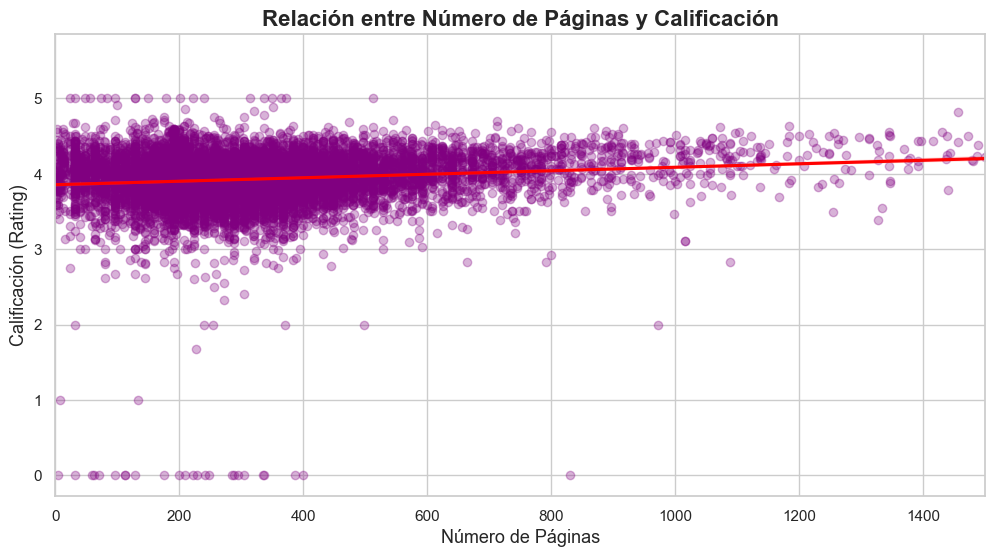

In [71]:
#2. ¿Existe alguna relación entre el número de las páginas y la calificación que recibe un libro?

plt.figure(figsize=(12, 6))

# Creamos el scatterplot con una regresión lineal (la línea que indica la tendencia)
sns.regplot(data=df_goodreads_limpio, x='num_pages', y='average_rating', 
            scatter_kws={'alpha':0.3, 'color':'purple'}, 
            line_kws={'color':'red'})

plt.title('Relación entre Número de Páginas y Calificación', fontsize=16, fontweight='bold')
plt.xlabel('Número de Páginas', fontsize=13)
plt.ylabel('Calificación (Rating)', fontsize=13)
plt.xlim(0, 1500) # Limitamos para ver mejor el grueso de los datos

plt.show()

>Tendencia Positiva Ligera: La linea roja, la linea de regresión, tiene una pendiente ascendente. Esto sugiere que, a medida que aumenta el número de páginas, la calificación promedio tiende a subir ligeramente.

>El "Filtro del Lector": ¿Por qué los libros largos tienen mejores notas? Hay una teoría estadística para esto: Supervivencia. Un lector que no disfruta un libro de 800 páginas lo abandona a la mitad y no suele puntuarlo. Quien lo termina es porque le ha encantado, lo que genera un sesgo hacia notas más altas en libros extensos.

>Concentración en la "Zona de Confort": La gran nube de puntos púrpura está entre las 200 y 500 páginas. Es el estándar de la industria. Ahí es donde encontramos la mayor variedad de opiniones (desde 1 estrella hasta 5).

>Menos Variabilidad en los "Tochos": A partir de las 800-1000 páginas, los puntos están mucho más cerca de la línea roja. Hay menos "odio" (notas bajas) en los libros muy largos.

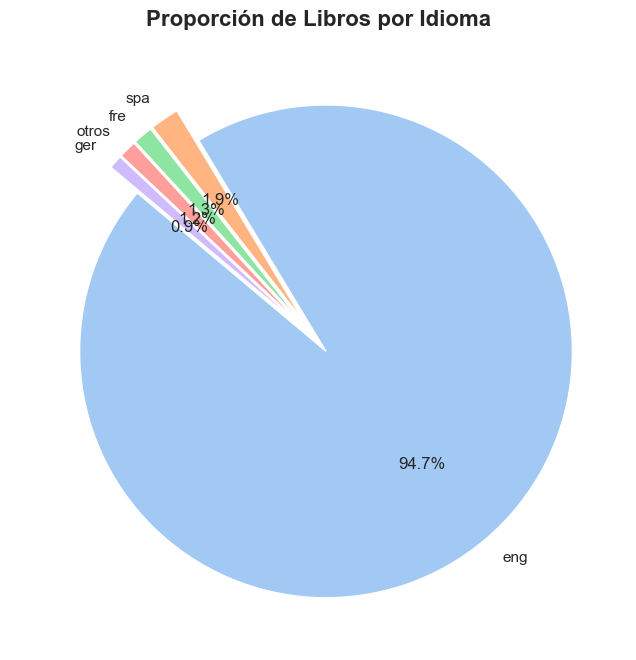

In [72]:
#3. ¿Cuál es la proporción de libros según los idiomas principales que limpiamos?

# Contamos los valores de la columna que limpiamos
idiomas_conteo = df_goodreads_limpio['language_code'].value_counts()

# Creamos el gráfico de tarta
plt.figure(figsize=(10, 8))
plt.pie(idiomas_conteo, labels=idiomas_conteo.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'), explode=[0.05, 0.1, 0.1, 0.1, 0.1])

plt.title('Proporción de Libros por Idioma', fontsize=16, fontweight='bold')
plt.show()

>Dominio Absoluto del Inglés: Con un 94.7%, el inglés no es solo el idioma principal, es prácticamente el dataset entero. Esto es un insight clave: cualquier conclusión general que saquemos del dataset estará fuertemente influenciada por la cultura y el mercado editorial anglosajón.

>Mercado Hispano: El español (spa) es el segundo en la lista, pero con un 1.9%. Aunque parezca poco, en un dataset de 10,000 libros, son más de 200 obras, lo cual es suficiente para realizar comparaciones estadísticas (como el test de hipótesis que haremos luego).


In [73]:
#4 ¿Cómo varía la calificación promedio entre los 5 autores con más libros en el dataset?

#Obtenemos los nombres de los 5 autores con más libros:

top_5_autores = df_goodreads_limpio['authors'].value_counts().head(5).index

In [ ]:
#Filtramos el dataset para quedarnos solo con esos 5

df_top_autores = df_goodreads_limpio[df_goodreads_limpio['authors'].isin(top_5_autores)]

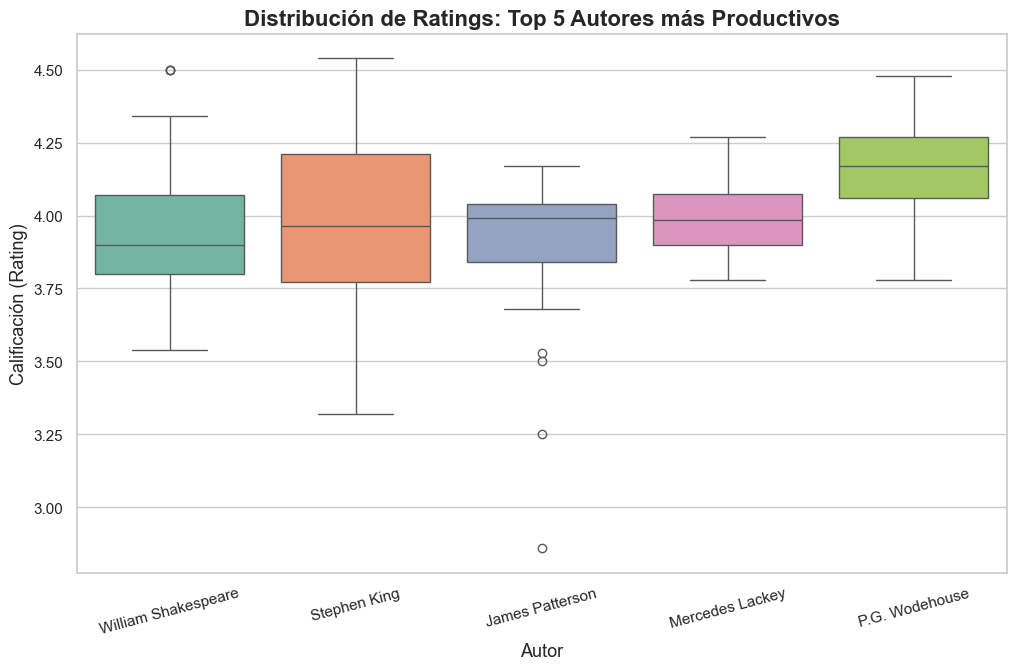

In [75]:
#Creamos el Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top_autores, x='authors', y='average_rating', palette='Set2')

plt.title('Distribución de Ratings: Top 5 Autores más Productivos', fontsize=16, fontweight='bold')
plt.xlabel('Autor', fontsize=13)
plt.ylabel('Calificación (Rating)', fontsize=13)
plt.xticks(rotation=15) # Rotamos los nombres para que se lean bien

plt.show()

>P.G. Wodehouse, el Rey de la Consistencia: Su caja verde la que está más alta en el gráfico. No solo tiene una mediana superior al 4.0, sino que sus "bigotes" son relativamente cortos. Esto indica que casi todo lo que escribió gusta mucho y a casi todo el mundo por igual.

>Stephen King y la Variabilidad: La caja naranja es la más larga. Es lógico: con una carrera tan extensa y prolífica, tiene obras maestras (el bigote superior llega casi al 4.5) y algunos libros que no convencieron tanto (el bigote inferior baja del 3.5). Es un autor de "extremos".

>James Patterson y los Outliers: Patterson tiene varios libros con notas muy bajas (incluso uno cerca del 2.75). Esto suele pasar con autores que publican muchísimas colaboraciones; la calidad tiende a ser más irregular.

>Shakespeare, el Clásico Estable: Su caja es muy compacta y está centrada en el 3.9. Esto demuestra que, siglos después, su valoración sigue siendo sólida y predecible.

In [80]:
#5. ¿Cómo ha cambiado el número de las reseñas promedio a lo largo de los años?

#Convertimos a datetime (por si acaso) y extraemos solo el año
df_goodreads_limpio['year'] = pd.to_datetime(df_goodreads_limpio['publication_date']).dt.year

In [81]:
#Agrupamos por este nuevo campo 'year'
evolucion_resenas = df_goodreads_limpio.groupby('year')['text_reviews_count'].mean()

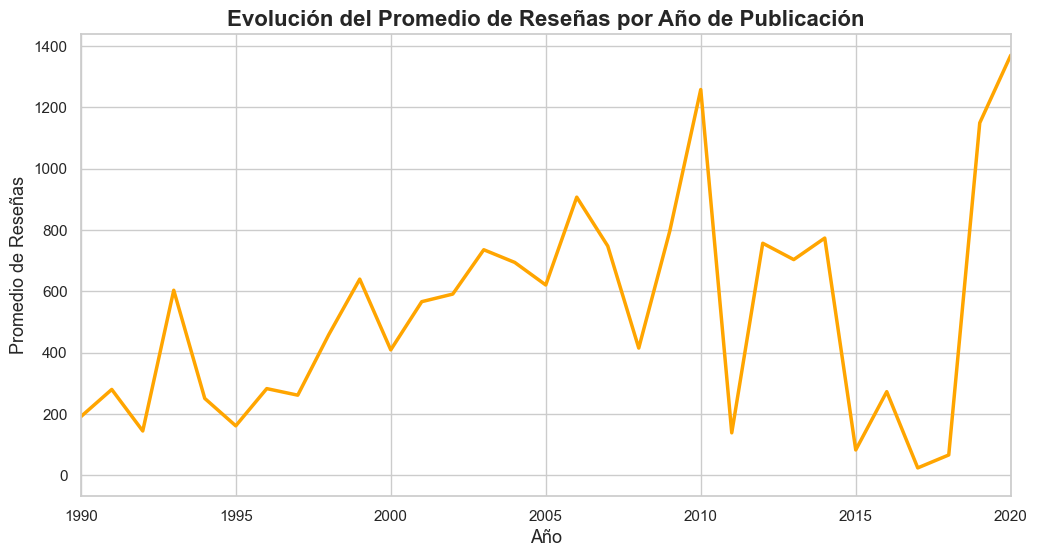

In [82]:
#Graficamos
plt.figure(figsize=(12, 6))
sns.lineplot(x=evolucion_resenas.index, y=evolucion_resenas.values, color='orange', linewidth=2.5)

plt.title('Evolución del Promedio de Reseñas por Año de Publicación', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=13)
plt.ylabel('Promedio de Reseñas', fontsize=13)

#Ajustamos el rango y hacemos que los años se vean cada 5 años para que no se amontonen
plt.xlim(1990, 2020)
plt.xticks(range(1990, 2021, 5)) # Esto pone etiquetas en 1990, 1995, 2000...

plt.show()

>Hay una tendencia ascendente en el promedio de reseñas escritas desde 1990, con picos brutales en 2010 y 2020.

>Esto no significa necesariamente que los libros de 2020 sean mejores, sino que el engagement digital ha explotado. Los libros publicados recientemente se benefician de las redes sociales (BookTok, Instagram) y de una base de usuarios de Goodreads mucho más activa que la que había en los años 90.

In [83]:
#6. ¿Existe alguna correlación entre el número total de votos y el número de reseñas escritas?

#Seleccionamos las columnas numéricas clave

# Usamos las columnas identificadas: average_rating, num_pages, ratings_count y text_reviews_count
cols_numericas = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
matriz_corr = df_goodreads_limpio[cols_numericas].corr()

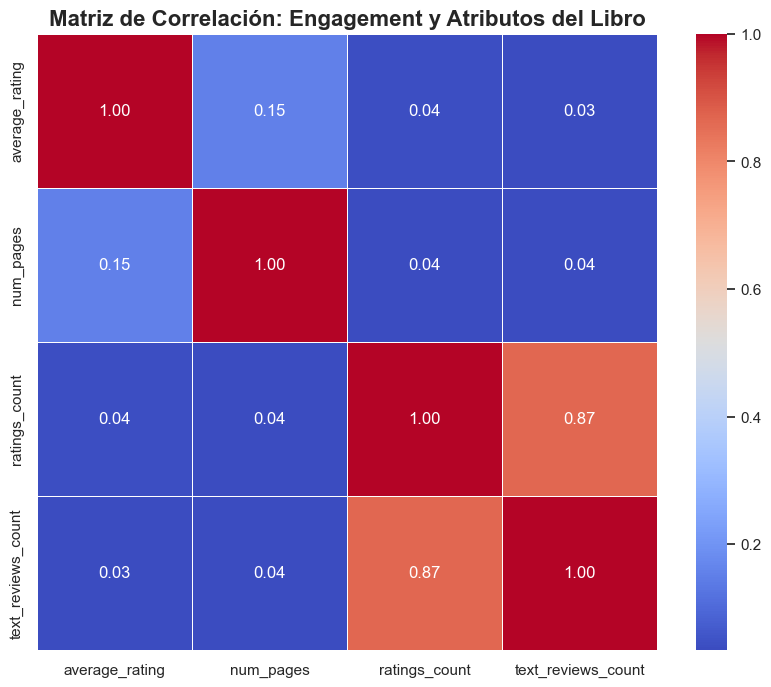

In [84]:
#Creamos el mapa de calor (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación: Engagement y Atributos del Libro', fontsize=16, fontweight='bold')
plt.show()

 >Si observamos el cruce entre ratings_count y text_reviews_count, 0.87 es una correlación positiva muy fuerte. Significa que la popularidad de un libro es el motor principal de la conversación: cuanta más gente califica un libro, más gente se siente motivada a escribir una reseña detallada. Van de la mano casi perfectamente.

>Independencia de la Calidad (0.04): Este es un gran hallazgo. La correlación entre la nota media (average_rating) y el número de votos (ratings_count) es de solo 0.04.

>La popularidad no garantiza calidad, ni la calidad garantiza popularidad. Hay libros mediocres con millones de votos y joyas literarias ocultas con 5 estrellas pero muy pocos lectores.

>Finalmente, la relación entre num_pages y average_rating es de 0.15. Como vimos en el scatterplot, es positiva pero muy débil. Escribir un libro más largo no asegura una mejor nota, aunque existe una ligera tendencia a favor de los libros extensos.

In [85]:
#Test de Hipótesis: ¿Influye el idioma en la calificación?

#Filtramos los datos para los dos grupos principales:

rating_eng = df_goodreads_limpio[df_goodreads_limpio['language_code'] == 'eng']['average_rating'].to_numpy()
rating_spa = df_goodreads_limpio[df_goodreads_limpio['language_code'] == 'spa']['average_rating'].to_numpy()

In [86]:
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Comprueba normalidad (Shapiro-Wilk o Kolmogorov-Smirnov).
    2. Comprueba igualdad de varianzas (Bartlett o Levene).
    3. Aplica la prueba estadística adecuada (T-test, Welch o Mann-Whitney U).
    """
    
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos.")
    
    # 1. Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            # Kolmogorov-Smirnov si n > 50
            p_val_norm = stats.kstest(grupo, 'norm').pvalue  
        else:
            # Shapiro-Wilk si n <= 50
            p_val_norm = stats.shapiro(grupo).pvalue  
        normalidad.append(p_val_norm > 0.05)

    datos_normales = all(normalidad)

    # 2. Prueba de igualdad de varianzas (Homocedasticidad)
    if datos_normales:
        p_val_varianza = stats.bartlett(*args).pvalue
    else:
        p_val_varianza = stats.levene(*args, center="median").pvalue

    varianzas_iguales = p_val_varianza > 0.05

    # 3. Aplicar el test correspondiente
    if datos_normales:
        if varianzas_iguales:
            estadistico, p_value = stats.ttest_ind(*args, equal_var=True)
            test_usado = "T-test de Student (varianzas iguales)"
        else:
            estadistico, p_value = stats.ttest_ind(*args, equal_var=False)
            test_usado = "T-test de Welch (varianzas diferentes)"
    else:
        estadistico, p_value = stats.mannwhitneyu(*args)
        test_usado = "U de Mann-Whitney (no paramétrico)"

    alpha = 0.05

    # 4. Resultados
    conclusion = "H0 rechazada: Hay diferencias significativas." if p_value < alpha else "No se rechaza H0: No hay diferencias significativas."
    
    print("\n📊 **Resultados de la Prueba de Hipótesis**")
    print(f"✅ ¿Distribución Normal?: {'Sí' if datos_normales else 'No'}")
    print(f"✅ Varianzas: {'Iguales' if varianzas_iguales else 'Diferentes'} (p = {p_val_varianza:.4f})")
    print(f"✅ Test Aplicado: {test_usado}")
    print(f"🔢 Estadístico: {estadistico:.4f}, p-value: {p_value:.4f}")
    print(f"📝 Conclusión: {conclusion}\n")

    return p_value

# Preparamos los grupos basados en el idioma
rating_ingles = df_goodreads_limpio[df_goodreads_limpio['language_code'] == 'eng']['average_rating'].to_numpy()
rating_espanol = df_goodreads_limpio[df_goodreads_limpio['language_code'] == 'spa']['average_rating'].to_numpy()

# Ejecutamos la comparación
p_val_final = prueba_hipotesis(rating_ingles, rating_espanol)


📊 **Resultados de la Prueba de Hipótesis**
✅ ¿Distribución Normal?: No
✅ Varianzas: Iguales (p = 0.2511)
✅ Test Aplicado: U de Mann-Whitney (no paramétrico)
🔢 Estadístico: 1014104.5000, p-value: 0.2840
📝 Conclusión: No se rechaza H0: No hay diferencias significativas.



>¿Distribución Normal? No: Como sospechábamos por el histograma, las calificaciones no siguen una campana de Gauss perfecta. La función eligió el test U de Mann-Whitney, que es el correcto para estos casos.

>p-value: 0.2840: En estadística, buscamos un valor menor a 0.05 para decir que algo es "especial" o diferente. Como 0.28 es mucho mayor, la conclusión es clara.

>La Conclusión Real: Tal y como esperábamos, hay evidencia estadística para decir que los libros en inglés tienen mejores (o peores) notas que los libros en español. Los lectores, independientemente del idioma, califican de forma muy similar.